In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Boys1 = [1,1,1,1,1,1,1,1,1,1.5]
Girls1 = [4,3.5,2.5,4,3.5,2,4,3.5,4,2]

Boys2 = [1,1,1,1,1,1,1,1,1,1]
Girls2 = [5,4.5,4.5,4.5,3.5,4.5,5,4,4.5,2.5]

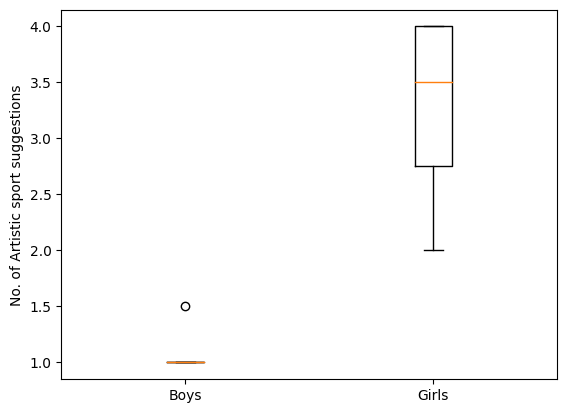

In [3]:
dd = [Boys1,Girls1]
plt.boxplot(dd)
plt.xticks([1, 2], ["Boys","Girls"])
plt.ylabel('No. of Artistic sport suggestions')
plt.show()

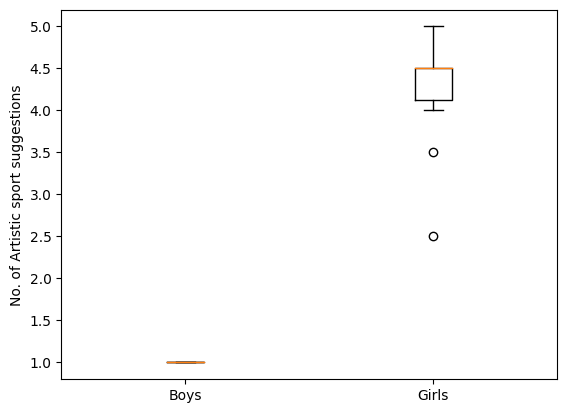

In [4]:
dd = [Boys2,Girls2]
plt.boxplot(dd)
plt.xticks([1, 2], ["Boys","Girls"])
plt.ylabel('No. of Artistic sport suggestions')
plt.show()

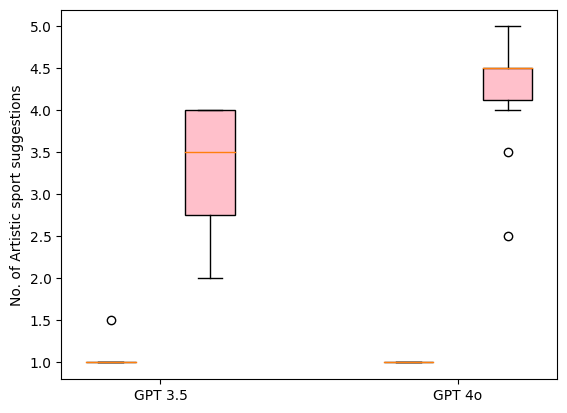

In [5]:
# Combine the data into a list with adjusted positions

# GPT 3.5
Boys1 = [1,1,1,1,1,1,1,1,1,1.5] 
Girls1 = [4,3.5,2.5,4,3.5,2,4,3.5,4,2]

# GPT 4o
Boys2 = [1,1,1,1,1,1,1,1,1,1]
Girls2 = [5,4.5,4.5,4.5,3.5,4.5,5,4,4.5,2.5]


data = [Boys1, Girls1, Boys2, Girls2]

# Create the box plot with custom positions
fig, ax = plt.subplots()
box = ax.boxplot(data, positions=[1, 2, 4, 5], patch_artist=True)

# Colors for boys and girls
colors = ['blue', 'pink', 'blue', 'pink']

# Apply colors to each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-axis labels
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels(["GPT 3.5", "GPT 4o"])

# Set the y-axis label
plt.ylabel('No. of Artistic sport suggestions')

# Display the plot
plt.show()

In [6]:
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals
ci_boys1 = calculate_confidence_interval(Boys1)
ci_girls1 = calculate_confidence_interval(Girls1)
ci_boys2 = calculate_confidence_interval(Boys2)
ci_girls2 = calculate_confidence_interval(Girls2)

# Perform t-tests
t_boys, p_boys = stats.ttest_ind(Boys1, Boys2)
t_girls, p_girls = stats.ttest_ind(Girls1, Girls2)
t_gpt3, p_gpt3 = stats.ttest_ind(Boys1, Girls1)
t_gpt4, p_gpt4 = stats.ttest_ind(Boys2, Girls2)

# Create a summary table
summary_table = pd.DataFrame({
    "Group": ["Boys GPT 3.5", "Girls GPT 3.5", "Boys GPT 4o", "Girls GPT 4o"],
    "Mean": [ci_boys1[0], ci_girls1[0], ci_boys2[0], ci_girls2[0]],
    "CI Lower": [ci_boys1[1], ci_girls1[1], ci_boys2[1], ci_girls2[1]],
    "CI Upper": [ci_boys1[2], ci_girls1[2], ci_boys2[2], ci_girls2[2]],
    "p-value (vs other model)": [p_boys, p_girls, p_boys, p_girls],
    "p-value (vs opposite gender)": [p_gpt3, p_gpt3, p_gpt4, p_gpt4]
})

print(summary_table)

           Group  Mean  CI Lower  CI Upper  p-value (vs other model)  \
0   Boys GPT 3.5  1.05  0.936892  1.163108                  0.330565   
1  Girls GPT 3.5  3.30  2.711066  3.888934                  0.014966   
2    Boys GPT 4o  1.00  1.000000  1.000000                  0.330565   
3   Girls GPT 4o  4.25  3.710181  4.789819                  0.014966   

   p-value (vs opposite gender)  
0                  1.045085e-07  
1                  1.045085e-07  
2                  6.410748e-11  
3                  6.410748e-11  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
